# Project: Investigate No-Show Appointment Dataset

## Table of Contents

**In this notebook:**

* [Introduction](#Introduction)
* [Data Wrangling](#Data-Wrangling)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Conclusions](#Conclusion)

## Introduction

### About No-Show Appointment dataset

#### This dataset collects information from +100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Based on the dataset, we will work on answering the following Questions:

* Is there a certain day associated with higher percentage of no shows to scheduled appointments and How is weekdays loaded with scheduling requests?
* What about scheduled appointments behaviour over months? Is it increasing or decreasing?
* Do women take care of their health more compared to men?
* Which life stage of patients most frequent to schedule appointments?
* Is there certain age associated with higher percentage of adherence to scheduled appointment?
* Is enrollment to the welfare program positively affects number of scheduled appointments?
*  Are Females enrolled to scholarship program associated with higher percentage of adherence to scheduled appointment than Males?
* What are the top five hospitals with the most loaded with appointments ?

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df=pd.read_excel('No show patients.xlsx')

# Data-Wrangling

In [3]:
# number of rows and columns

df.shape

(110527, 14)

In [4]:
#exploring general informaton about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Check for cells containing null values

df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
#checking for duplicated values

df.duplicated().sum()

0

In [7]:
# exploring data head rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Observations

1. The data consists of 110522 entries and 14 column
2. The Data has no null values
3. The Data has no duplicate values
4. Data types vary amont floats,int64,objects
5. Date columns Data types are in strings data type which needs to be converted to Datetime

### Data Cleaning

**First**,I will rename some of the columns names into different names

In [8]:
df.rename(columns={'ScheduledDay': 'Scheduled_day', 'AppointmentDay': 'Appointment_day', 'Patientid': 'Patient_id', 'Appointmentid': 'Appointment_id'}, inplace=True)

# confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**Second**,change the date format of the Appointment day column from date-time to date only and change the values into date only

In [9]:
#first we have to change the AppointmentDay column data type from object to Datetime

df['Appointment_day']=pd.to_datetime(df['Appointment_day'])

df['Scheduled_day']=pd.to_datetime(df['Scheduled_day'])

In [10]:
#change the format of the column to Date only

df['Appointment_day']=df['Appointment_day'].dt.date

df['Scheduled_day']=df['Scheduled_day'].dt.date


In [11]:
# lets change the AppointmentDay column data type from object to Datetime again since the operation above converts type back to object

df['Appointment_day']=pd.to_datetime(df['Appointment_day'])

df['Scheduled_day']=pd.to_datetime(df['Scheduled_day'])

**Third**,change the format of the date columns to Date only

**Fourth**,check that the appointment day is the same as the scheduled days

In [12]:
# verify that appointment days are same as the scheduled days.

(df['Appointment_day'] >= df['Scheduled_day']).sum() - df.shape[0] # must return 0

-5

In [13]:
# these are the 5 records where appointment day is before Scheduled day
df[df['Appointment_day'] < df['Scheduled_day']]

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTأٹNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTأ”NIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAأ‡أƒO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTأ”NIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [14]:
# drop the unmatched records from the dataset

fakerecords=list(df[df['Appointment_day'] < df['Scheduled_day']].index)
df.drop(index=fakerecords,inplace=True)

In [15]:
# checking the update (-5 records are deleted)
df.shape

(110522, 14)

**Fifth**,Creat a weedays column to answer a secific question

In [16]:
#create new column for weekdays names

df['sched_weekday'] = df['Scheduled_day'].dt.day_name()
df['sched_month']=df['Appointment_day'].dt.month_name()

In [17]:
# Check final results

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110522 non-null  float64       
 1   AppointmentID    110522 non-null  int64         
 2   Gender           110522 non-null  object        
 3   Scheduled_day    110522 non-null  datetime64[ns]
 4   Appointment_day  110522 non-null  datetime64[ns]
 5   Age              110522 non-null  int64         
 6   Neighbourhood    110522 non-null  object        
 7   Scholarship      110522 non-null  int64         
 8   Hipertension     110522 non-null  int64         
 9   Diabetes         110522 non-null  int64         
 10  Alcoholism       110522 non-null  int64         
 11  Handcap          110522 non-null  int64         
 12  SMS_received     110522 non-null  int64         
 13  No-show          110522 non-null  object        
 14  sched_weekday    110

# ExploratoryDataAnalysis

#### let us start our investigation of the above questions. But, first, lets check some statistics and create a heatmap to see how different variables are correlated.

In [18]:
# Check Summary Statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


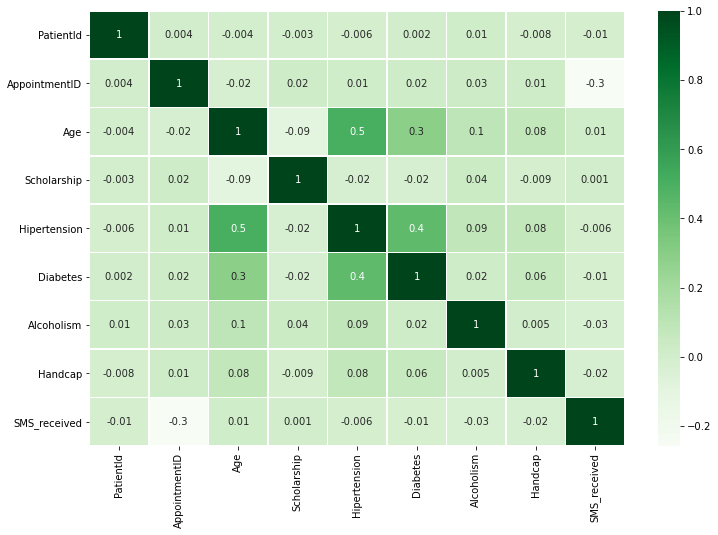

In [19]:
# creating heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens',fmt='.1g',linewidth=0.5);

### Observations

Moderate correlation

* Age and hypertension
* Diabetes nd Hypertension
* Age and Diabetes

### Q1: Is there a certain day associated with higher percentage of no shows to scheduled appointments and How is weekdays loaded with scheduling requests?

In [20]:
df_noshows=df[df['No-show']=='Yes'].groupby(['sched_weekday'])['PatientId'].count()
df_noshows

sched_weekday
Friday       3887
Monday       4561
Saturday        1
Thursday     3699
Tuesday      5290
Wednesday    4876
Name: PatientId, dtype: int64

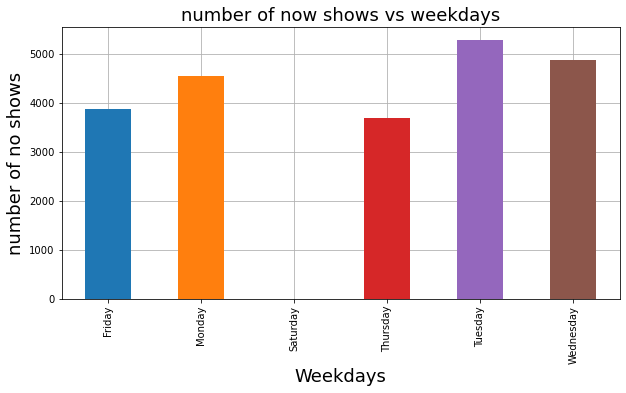

In [21]:
#plot Accumulative Number of appointments per weekday
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'];
df_noshows=df[df['No-show']=='Yes'].groupby(['sched_weekday'])['PatientId'].count()
plt.figure(figsize=(10,5));
df_noshows.plot.bar(color=colors,zorder=3);
plt.title('number of now shows vs weekdays',size=18);
plt.xlabel('Weekdays',size=18);
plt.ylabel('number of no shows',size=18);
plt.grid(zorder=0)

#### Friday as the most day that is associated with higher percentage of no shows with 20.55% no shows and total appointments of 18915 and count of no shows 3887

### Q2:What about scheduled appointments behaviour over months? Is it increasing or decreasing?

In [22]:
df_month=df.groupby('sched_month')['PatientId'].count().sort_values(ascending=True)

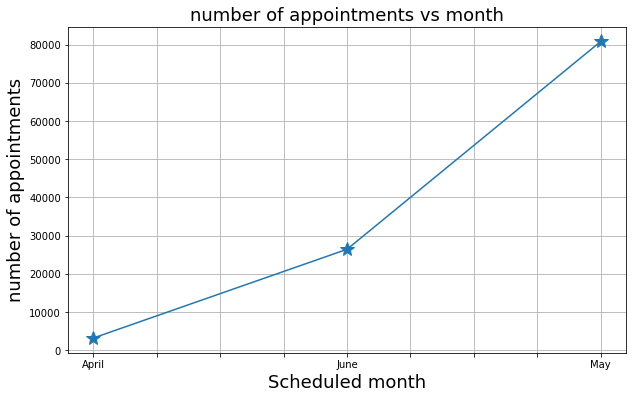

In [23]:
plt.figure(figsize=(10,6))
df_month.plot.line(marker='*',markersize=15);
plt.title('number of appointments vs month',size=18);
plt.xlabel('Scheduled month',size=18);
plt.ylabel('number of appointments',size=18);
plt.grid()

#### number of appointments increase every month but increased dramaticaly from month April reaching to May

### Q3:Do women take care of their health more compared to men?

In [24]:
#group scheduled appointment by Gender
df_gender_count=df.groupby(['Gender'])['PatientId'].count()
df_gender_count

Gender
F    71837
M    38685
Name: PatientId, dtype: int64

In [25]:
# Rename F & M Labels to Female & Male
df_gender_count=df_gender_count.rename({'F':'Female','M':'Male'})
df_gender_count

Gender
Female    71837
Male      38685
Name: PatientId, dtype: int64

In [26]:
###Difference between Females and males appointments

Diff=df_gender_count['Female']-df_gender_count['Male']
Diff

33152

In [27]:
# percentage of females

percentage_of_females=df_gender_count['Female']/df_gender_count.sum()*100
print('Percentage of Females is',"%.2f"%percentage_of_females,'%')

Percentage of Females is 65.00 %


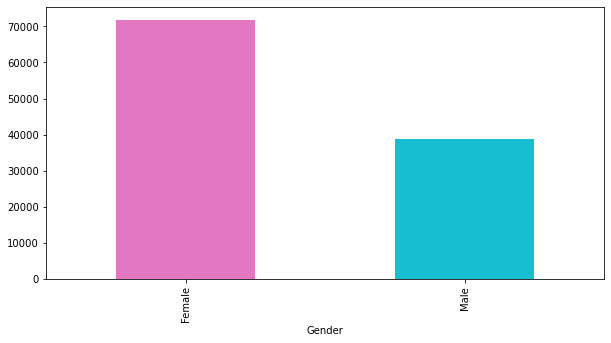

In [28]:
plt.figure(figsize=(10,5));
df_gender_count.plot.bar(color=['#e377c2', '#17becf']);

#### Female is the greater proportion as %65 of scheduled appointments are by Females, this could mean that women take  more care of their health in comparison to Men.

### Q4: Which life stage of patients most frequent to schedule appointments?

In [29]:
# no of appointments for ech age , note that -1,0 are for recently born babies

df_age_count = df.groupby(['Age'])['PatientId'].count()
df_age_count=df_age_count.sort_values(ascending=False)
df_age_count.head(10)

Age
0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1628
59    1624
2     1618
50    1613
Name: PatientId, dtype: int64

In [30]:
#Age Feature charcteristics

df['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

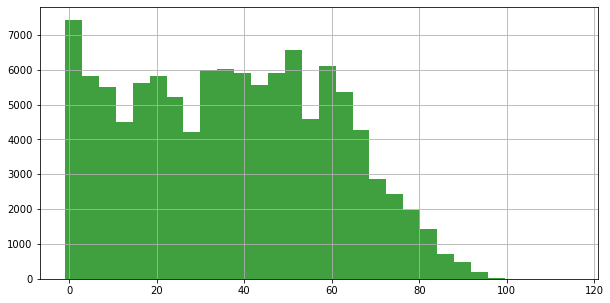

In [31]:
df['Age'].hist(bins=30, figsize=(10,5),color='g',alpha=0.75);

In [32]:
#maximum Age which that an appointments

df_age_count.head(1)

Age
0    3539
Name: PatientId, dtype: int64

#### insights states that the mean Age to book appointments is 37 years old and the maximum number of appointments was made by 0 Age which is newly bornbabies

### Q5: Is there certain age associated with higher percentage of adherence to scheduled appointment?

In [33]:
df_adherence_age=df[df['No-show']=='No']
df_adherence_age=df_adherence_age.groupby(['Age'])['PatientId'].count()
df_adherence_age=df_adherence_age.sort_values(ascending=False)
df_adherence_age

Age
 0      2900
 1      1858
 52     1449
 56     1372
 2      1366
        ... 
 100       4
 115       2
 102       2
 99        1
-1         1
Name: PatientId, Length: 104, dtype: int64

#### As per the insights the date associated with highest adherence for appointments is 0 which is newly born babies

### Q6: Is enrollment to the welfare program positively affects number of scheduled appointments?

In [34]:
df_scholar = df.groupby('Scholarship')['PatientId'].count()
df_scholar

Scholarship
0    99661
1    10861
Name: PatientId, dtype: int64

In [35]:
df_scholar_noshow=df[(df['Scholarship']==1)&(df['No-show']=='Yes')]
df_scholar_show=df[(df['Scholarship']==1)&(df['No-show']=='No')]

In [36]:
# Number of patients who went for scholarships and didnt show up for medical appointments

df_scholar_noshow.shape[0]

2578

In [37]:
# Number of patients who went for scholarships and showed up for medical appointments

df_scholar_show.shape[0]

8283

In [38]:
df_scholar_noshow2=df[(df['Scholarship']==0)&(df['No-show']=='Yes')]
df_scholar_show2=df[(df['Scholarship']==0)&(df['No-show']=='No')]

In [39]:
df_scholar_noshow2.shape[0]

19736

In [40]:
df_scholar_show2.shape[0]

79925

#### So the answer is that there isnt a positive correlation between having a scholarship and adhering to a medical appointment since their is a large number of patients (799250) with no scholarships and still went to the medical appointments.

### Q7: Are Females enrolled to scholarship program associated with higher percentage of adherence to scheduled appointment than Males?

We will make a data frame with females who went for scholarship and didnot show up for medical appointments

In [41]:
Females_sch_no=df[(df['Gender']=='F')&(df['Scholarship']==1)&(df['No-show']=='Yes')]

In [42]:
# Number of females with scholarship who didnt showup for medical appointments

Females_sch_no.shape[0]

2106

We will make a data frame with Males who went for scholarship and didnot show up for medical appointments

In [43]:
df_males_sch=df[(df['Gender']=='M')&(df['Scholarship']==1)&(df['No-show']=='No')]

In [44]:
# Number of males with scholarship who didnt showup for medical appointments

df_males_sch.shape[0]

1536

#### Yes females who are enrolled into a scholarship are more likely to not show for medical appointments

### Q8: What are the top five hospitals with the most loaded with appointments ?

In [45]:
df_hospitals=df.groupby('Neighbourhood')['Appointment_day'].count().sort_values(ascending=False).head(5)
df_hospitals

Neighbourhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTأٹNCIA       4430
JARDIM DA PENHA    3877
ITARARأ‰           3514
Name: Appointment_day, dtype: int64

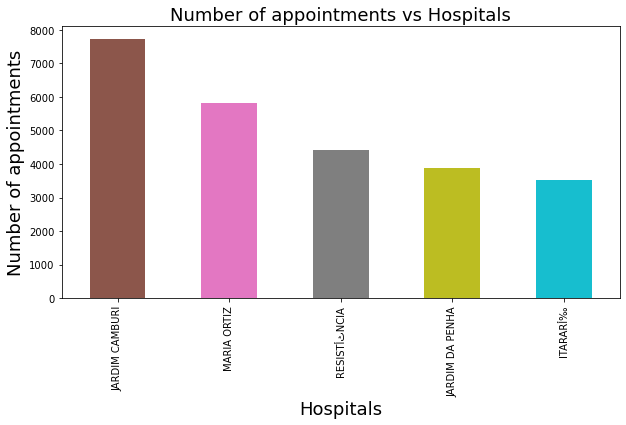

In [46]:
plt.figure(figsize=(10,5));
df_hospitals.plot.bar(color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']);
plt.xlabel('Hospitals',size=18);
plt.ylabel('Number of appointments',size=18);
plt.title('Number of appointments vs Hospitals',size=18);

Hospitals with most number of appointments:

1. JARDIM CAMBURI-->7717
2. MARIA ORTIZ-->5805
3. RESISTINICA-->4430
4. JARDIM DA PENHA-->3877
5. ITARA--> 3534

## Conclusions

### Findings

1- Friday as the most day that is associated with higher percentage of no shows with 20.55% no shows and total appointments of 
18915 and count of no shows 3887.

2- Number of appointments increase every month but increased dramaticaly from month April reaching to May

3- Female is the greater proportion as %65 of scheduled appointments are by Females, this could mean that women take  more care of their health in comparison to Men.

4- Insights states that the mean Age to book appointments is 37 years old and the maximum number of appointments was made by 0 Age which is newly bornbabies.

5- As per the insights the date associated with highest adherence for appointments is 0 which is newly born babies.

6- There isnt a positive correlation between having a scholarship and adhering to a medical appointment since their is a large number of patients (799250) with no scholarships and still went to the medical appointments.

7- Females who are enrolled into a scholarship are more likely to not show for medical appointments

8- Hospitals with most number of appointments:

1. JARDIM CAMBURI-->7717
2. MARIA ORTIZ-->5805
3. RESISTINICA-->4430
4. JARDIM DA PENHA-->3877
5. ITARA--> 3534